<a href="https://colab.research.google.com/github/Leiryanny/Portifolio-ETL-Analise-Dados/blob/main/diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de ETL e análise de dados: Diversidade em Empresas de Tecnologia

### Descrição do projeto

###### Este projeto tem como objetivo realizar a Extração, Transformação e Carga (ETL) de um conjunto de dados contendo informações sobre diversidade de gênero e etnia em empresas de tecnologia.
###### Os dados foram obtidos a partir do seguinte conjunto de dados disponível no Kaggle:https://www.kaggle.com/datasets/jainaru/diversity-in-tech-companies/data.
###### Os dados serão extraídos de um arquivo CSV localizado no meu computador. Em seguida, serão realizadas diversas transformações nos dados para limpeza e preparação, incluindo tratamento de valores ausentes, conversão de tipos de dados e renomeação de colunas.
###### Após a etapa de ETL, será utilizada a biblioteca Pandera para validar a integridade e a qualidade dos dados tratados, garantindo que a estrutura e os tipos de dados do DataFrame estejam conforme o esperado.Em seguida, os dados tratados serão carregados no ambiente do Google Drive para facilitar o compartilhamento e análise colaborativa.
###### E, por fim, serão realizadas algumas análises estatísticas que serão acompanhadas por visualizações gráficas claras e informativas.



### Extração dos dados

###### Para realizar a extração e carregamento dos dados, será utilizada a biblioteca pandas em conjunto com o ambiente do Google Colab.

In [167]:
# Upload de arquivos do sistema local para o Google Colab
from google.colab import files
upload = files.upload()

Saving diversity_in_tech_companies.csv to diversity_in_tech_companies (3).csv


In [168]:
# Importação da biblioteca pandas
import pandas as pd

# Nome do arquivo
arquivo = 'diversity_in_tech_companies.csv'

# Carregamento do arquivo em um dataframe
df_bruto = pd.read_csv(arquivo)

# Exibição do cabeçalho do dataframe
df_bruto

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
...,...,...,...,...,...,...,...,...,...,...,...
89,2014,Groupon,47,53,71,15,5,4,-,4,-
90,2014,Amazon,37,63,60,13,9,15,-,3,-
91,2014,Salesforce,29,71,67,22,4,2,2,3,-
92,2014,Pandora,49,51,71,12,7,3,6,1,-


### Informações do DataFrame

###### Antes de prosseguir com a etapa de Limpeza e Transformação de Dados (ETL), é importante examinar algumas informações básicas sobre o DataFrame que contém os dados de diversidade em empresas de tecnologia. Essas informações ajudarão a entender a estrutura dos dados e a determinar quais transformações podem ser necessárias.

###### O DataFrame contém dados relacionados à diversidade de gênero e etnia em empresas de tecnologia, coletados ao longo de vários anos. Cada linha do DataFrame representa uma empresa específica em um determinado ano e as proporções de diferentes grupos demográficos dentro da empresa.

###### Colunas Analisadas:

1. Year (Ano): Indica o ano em que os dados foram registrados.
2. Company (Empresa): O nome da empresa de tecnologia.
3. Female % (Porcentagem de Mulheres): A porcentagem de funcionários que são do sexo feminino na empresa.
4. Male % (Porcentagem de Homens): A porcentagem de funcionários que são do sexo masculino na empresa.
5. % White (% Brancos): A porcentagem de funcionários que são brancos na empresa.
6. % Asian (% Asiáticos): A porcentagem de funcionários que são asiáticos na empresa.
7. % Latino (% Latinos): A porcentagem de funcionários que são latinos na empresa.
8. % Black (% Negros): A porcentagem de funcionários que são negros na empresa.
9. % Multi (% Multirraciais): A porcentagem de funcionários que são de múltiplas etnias na empresa.
10. % Other (% Outros): A porcentagem de funcionários que pertencem a outras etnias na empresa.
11. % Undeclared (% Não Declarado): A porcentagem de funcionários cuja etnia não foi declarada.


###### Resumo e tamanho do DataFrame

In [169]:
# Resumo do DataFrame
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB


In [170]:
# Tamanho do dataframe
linhas, colunas = df_bruto.shape
print('O dataframe possui', linhas, 'linhas e', colunas, 'colunas')

O dataframe possui 94 linhas e 11 colunas


### Limpeza e transformação dos dados

###### Nesta etapa do projeto, os dados serão preparados para análise por meio de uma série de operações de Limpeza e Transformação de Dados, também conhecidas como ETL (Extração, Transformação e Carga)

###### 1. Renomeação de colunas

In [171]:
# Renomeação das colunas
df_bruto.rename(columns={
    'Year': 'Ano',
    'Company': 'Empresa',
    'Female %': '% de Mulheres',
    'Male %': '% de Homens',
    '% White': '% de Brancos',
    '% Asian': '% de Asiáticos',
    '% Latino': '% de Latinos',
    '% Black': '% de Negros',
    '% Multi': '% de Multirraciais',
    '% Other': '% de Outros',
    '% Undeclared': '% de Não Declarados'
}, inplace=True)
df_bruto.head()

,Ano,Empresa,% de Mulheres,% de Homens,% de Brancos,% de Asiáticos,% de Latinos,% de Negros,% de Multirraciais,% de Outros,% de Não Declarados
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


###### 2. Verificação de valores únicos

In [172]:
# Verificação de valores únicos em cada coluna
colunas_unicos = ['Ano', 'Empresa', '% de Mulheres', '% de Homens', '% de Brancos', '% de Asiáticos', '% de Latinos', '% de Negros', '% de Multirraciais', '% de Outros', '% de Não Declarados']

# Verificar elementos únicos em cada coluna
for column in colunas_unicos:
    elementos_unicos = df_bruto[column].unique()
    print(f"Elementos únicos da coluna {column}: {elementos_unicos}")

Elementos únicos da coluna Ano: [2018 2017 2016 2015 2014]
Elementos únicos da coluna Empresa: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp'
 'Apple (excluding undeclared)']
Elementos únicos da coluna % de Mulheres: [37 31 32 24 40 50 17 28 27 44 39 54 26 49 38 45 41 43 36 30 23 33 16 42
 25 47 51 29]
Elementos únicos da coluna % de Homens: [63 69 68 76 60 50 83 72 74 56 61 46 51 62 55 59 57 64 70 77 67 84 58 75
 53 49 71]
Elementos únicos da coluna % de Brancos: [45 53 54 50 73 58 37 69 52 48 62 79 56 65 49 59 47 76 60 72 64 38 63 61
 71 67 55]
Elementos únicos da coluna % de Asiáticos: ['44' '36' '21' '37' '39' '12' '28' '45' '9' '14' '20' '13' '10' '31' '24'
 '16' '32' '15' '35' '40' '38' '43' '19' '65' '-' '25' '6' '23' '11' '26'
 '29' '22' '18' '30']
Elementos únicos da coluna % de Latinos: ['4' '13' '5' '6' '8' '7' '3' '11' 

###### 3. Verificação de valores ausentes

In [173]:
# Verificação de valores nulos/ausentes
df_bruto.isnull().sum()

Ano                    0
Empresa                0
% de Mulheres          0
% de Homens            0
% de Brancos           0
% de Asiáticos         0
% de Latinos           0
% de Negros            0
% de Multirraciais     0
% de Outros            1
% de Não Declarados    0
dtype: int64

In [174]:
# Filtragem dos dados nulos e impressão das linhas
dados_nulos = df_bruto[df_bruto.isnull().any(axis=1)]
print(dados_nulos)


     Ano Empresa  % de Mulheres  % de Homens  % de Brancos % de Asiáticos  \
54  2016   Etsy              51           49            79             11   

   % de Latinos % de Negros % de Multirraciais % de Outros % de Não Declarados  
54            4           3                  3         NaN                   -  


###### 4. Substituição de ausentes e caracteres

In [175]:
# Lista de colunas a serem tratadas
colunas = ['Empresa', '% de Asiáticos', '% de Latinos', '% de Negros', '% de Multirraciais', '% de Outros', '% de Não Declarados']

# Substituir '-', nan e '<1' por zero em todas as colunas
for column in colunas:
    df_bruto[column] = df_bruto[column].replace('-', '0')
    df_bruto[column] = df_bruto[column].replace('<1', '0')
    df_bruto[column].fillna(0, inplace=True)
    # Substituir 'Apple (excluding undeclared)', por 'Aple'
    df_bruto[column] = df_bruto[column].replace('Apple (excluding undeclared)', 'Apple')

# Verificar se as substituições foram realizadas corretamente
for column in colunas:
    print(f"Elementos únicos da coluna {column}: {df_bruto[column].unique()}")

Elementos únicos da coluna Empresa: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp']
Elementos únicos da coluna % de Asiáticos: ['44' '36' '21' '37' '39' '12' '28' '45' '9' '14' '20' '13' '10' '31' '24'
 '16' '32' '15' '35' '40' '38' '43' '19' '65' '0' '25' '6' '23' '11' '26'
 '29' '22' '18' '30']
Elementos únicos da coluna % de Latinos: ['4' '13' '5' '6' '8' '7' '3' '11' '19' '9' '10' '12' '35' '0' '14' '16']
Elementos únicos da coluna % de Negros: ['2' '3' '9' '4' '1' '10' '14' '8' '21' '5' '6' '0' '7' '15']
Elementos únicos da coluna % de Multirraciais: ['2' '4' '3' '1' '0' '14' '5' '6']
Elementos únicos da coluna % de Outros: ['3' '0' '1' '5' '4' '2' 0]
Elementos únicos da coluna % de Não Declarados: ['0' '2' '13' '1' '6' '9']


In [176]:
# Nova verificação de dados nulos
df_bruto.isnull().sum()

Ano                    0
Empresa                0
% de Mulheres          0
% de Homens            0
% de Brancos           0
% de Asiáticos         0
% de Latinos           0
% de Negros            0
% de Multirraciais     0
% de Outros            0
% de Não Declarados    0
dtype: int64

###### 5. Verificação de duplicatas

In [177]:
df_bruto.duplicated().sum()

0

###### 6.Tipos de dados e conversão

In [178]:
# Verificação os tipos de dados das colunas do DataFrame
df_bruto.dtypes

Ano                     int64
Empresa                object
% de Mulheres           int64
% de Homens             int64
% de Brancos            int64
% de Asiáticos         object
% de Latinos           object
% de Negros            object
% de Multirraciais     object
% de Outros            object
% de Não Declarados    object
dtype: object

In [179]:
# Conversão de colunas para int
colunas_int = ['% de Asiáticos', '% de Latinos', '% de Negros', '% de Multirraciais', '% de Outros', '% de Não Declarados']
for column in colunas_int:
  df_bruto[column] = df_bruto[column].astype(int)

# Converter a coluna "Ano" para datetime
df_bruto['Ano'] = pd.to_datetime(df_bruto['Ano'], format='%Y')

In [117]:
# Verificar novamente os tipos de dados
df_bruto.dtypes

Ano                    datetime64[ns]
Empresa                        object
% de Mulheres                   int64
% de Homens                     int64
% de Brancos                    int64
% de Asiáticos                  int64
% de Latinos                    int64
% de Negros                     int64
% de Multirraciais              int64
% de Outros                     int64
% de Não Declarados             int64
dtype: object

###### 7. Verificação do DataFrame tratado

In [180]:
# Visualização do dataframe tratado
df_bruto

,Ano,Empresa,% de Mulheres,% de Homens,% de Brancos,% de Asiáticos,% de Latinos,% de Negros,% de Multirraciais,% de Outros,% de Não Declarados
0,2018-01-01,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018-01-01,Google,31,69,53,36,4,3,4,0,0
2,2018-01-01,Apple,32,68,54,21,13,9,3,1,2
3,2018-01-01,Cisco,24,76,53,37,5,4,1,0,0
4,2018-01-01,eBay,40,60,50,39,6,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
89,2014-01-01,Groupon,47,53,71,15,5,4,0,4,0
90,2014-01-01,Amazon,37,63,60,13,9,15,0,3,0
91,2014-01-01,Salesforce,29,71,67,22,4,2,2,3,0
92,2014-01-01,Pandora,49,51,71,12,7,3,6,1,0


In [181]:
# Informações do dataframe tradado:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ano                  94 non-null     datetime64[ns]
 1   Empresa              94 non-null     object        
 2   % de Mulheres        94 non-null     int64         
 3   % de Homens          94 non-null     int64         
 4   % de Brancos         94 non-null     int64         
 5   % de Asiáticos       94 non-null     int64         
 6   % de Latinos         94 non-null     int64         
 7   % de Negros          94 non-null     int64         
 8   % de Multirraciais   94 non-null     int64         
 9   % de Outros          94 non-null     int64         
 10  % de Não Declarados  94 non-null     int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 8.2+ KB


### Integridade dos dados tratados

###### Esta etapa tem como objetivo garantir a integridade e a qualidade dos dados tratados após a fase de ETL (Extração, Transformação e Carga).
###### Será realizada uma validação dos dados utilizando a biblioteca Pandera para verificar a conformidade do DataFrame com um esquema predefinido, garantindo que os tipos de dados e a estrutura do DataFrame atendam às expectativas.

In [182]:
# Verificação da integridade dos dados

# Instalação do pacote pandera (quite)
!pip install pandera -q

In [184]:
# Importação da biblioteca pandera
import pandera as pa

In [185]:
# Definição do esquema de validação dos dados
schema = pa.DataFrameSchema({
    'Ano': pa.Column(pa.DateTime),
    'Empresa': pa.Column(pa.String),
    '% de Mulheres': pa.Column(pa.Int),
    '% de Homens': pa.Column(pa.Int),
    '% de Brancos': pa.Column(pa.Int),
    '% de Asiáticos': pa.Column(pa.Int),
    '% de Latinos': pa.Column(pa.Int),
    '% de Negros': pa.Column(pa.Int),
    '% de Multirraciais': pa.Column(pa.Int),
    '% de Outros': pa.Column(pa.Int),
    '% de Não Declarados': pa.Column(pa.Int),
})

# Validar o DataFrame com base no esquema
schema.validate(df_bruto)


,Ano,Empresa,% de Mulheres,% de Homens,% de Brancos,% de Asiáticos,% de Latinos,% de Negros,% de Multirraciais,% de Outros,% de Não Declarados
0,2018-01-01,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018-01-01,Google,31,69,53,36,4,3,4,0,0
2,2018-01-01,Apple,32,68,54,21,13,9,3,1,2
3,2018-01-01,Cisco,24,76,53,37,5,4,1,0,0
4,2018-01-01,eBay,40,60,50,39,6,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
89,2014-01-01,Groupon,47,53,71,15,5,4,0,4,0
90,2014-01-01,Amazon,37,63,60,13,9,15,0,3,0
91,2014-01-01,Salesforce,29,71,67,22,4,2,2,3,0
92,2014-01-01,Pandora,49,51,71,12,7,3,6,1,0


### Carregamento dos dados tratados para o Google Drive

###### Nesta etapa, os dados tratados serão carregados no Google Drive utilizando a funcionalidade de montagem do Google Colab. Isso permite que os dados sejam armazenados de forma segura no Google Drive, facilitando o acesso e a colaboração com outros membros da equipe. Após o carregamento, os dados estarão prontos para serem utilizados em análises subsequentes ou compartilhados conforme necessário.

In [186]:
# Carregamento no Google Drive

# Importação da biblioteca Google Colab
from google.colab import drive

# Montagem do drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
# Salvar os dados tratados no Google Drive
df_bruto.to_csv('/content/drive/MyDrive/exploratory-data-analysis/tratados/diversity_tratado.csv')

# Análises

In [188]:
# Importar o arquivo CSV tratado do Google Drive
caminho_arquivo = '/content/drive/MyDrive/exploratory-data-analysis/tratados/diversity_tratado.csv'
diversity_tratado = pd.read_csv(caminho_arquivo)

# Visualizar as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
diversity_tratado.head()


,Unnamed: 0,Ano,Empresa,% de Mulheres,% de Homens,% de Brancos,% de Asiáticos,% de Latinos,% de Negros,% de Multirraciais,% de Outros,% de Não Declarados
0,0,2018-01-01,Yahoo!,37,63,45,44,4,2,2,3,0
1,1,2018-01-01,Google,31,69,53,36,4,3,4,0,0
2,2,2018-01-01,Apple,32,68,54,21,13,9,3,1,2
3,3,2018-01-01,Cisco,24,76,53,37,5,4,1,0,0
4,4,2018-01-01,eBay,40,60,50,39,6,3,1,1,0


### 1. Distribuição Média de Gênero (2014 a 2018)

###### Neste código, os dados são filtrados para o intervalo de anos de 2014 a 2018. Em seguida, são calculadas as médias das porcentagens de mulheres e homens para cada ano dentro desse intervalo. Essas médias são usadas para criar um gráfico de linha mostrando a distribuição média de gênero ao longo do tempo. O gráfico apresenta as linhas do tempo para as porcentagens médias de mulheres e homens, permitindo uma análise visual das tendências de distribuição de gênero nas empresas ao longo do período especificado.









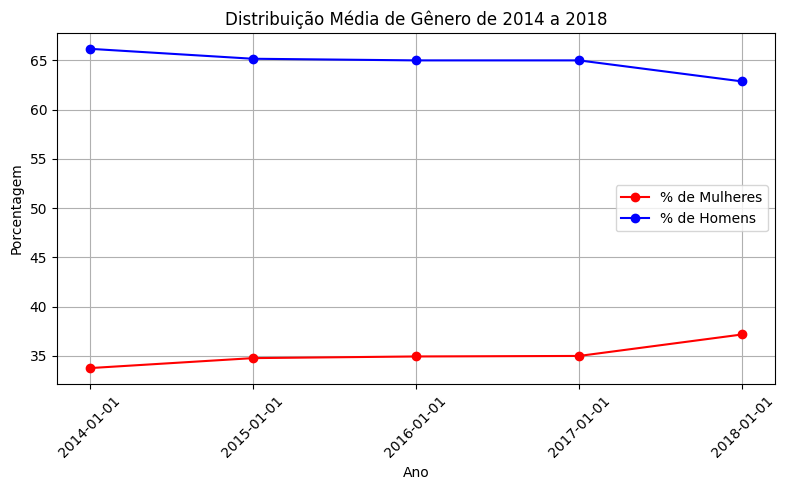

In [190]:
import matplotlib.pyplot as plt

# Filtrar os dados para o intervalo de anos desejado
dados_filtrados = diversity_tratado[(diversity_tratado['Ano'] >= '2014-01-01') & (diversity_tratado['Ano'] <= '2018-01-01')]

# Calcular a média das porcentagens de mulheres e homens para cada ano
media_porcentagem_mulheres_por_ano = dados_filtrados.groupby('Ano')['% de Mulheres'].mean()
media_porcentagem_homens_por_ano = dados_filtrados.groupby('Ano')['% de Homens'].mean()

# Criar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(media_porcentagem_mulheres_por_ano.index, media_porcentagem_mulheres_por_ano.values, marker='o', linestyle='-', color='red', label='% de Mulheres')
plt.plot(media_porcentagem_homens_por_ano.index, media_porcentagem_homens_por_ano.values, marker='o', linestyle='-', color='blue', label='% de Homens')
plt.title('Distribuição Média de Gênero de 2014 a 2018')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.legend()
plt.tight_layout()
plt.show()


######**Insights:**

- **Estabilidade na Representação Feminina:** A presença feminina (linha vermelha) manteve-se relativamente estável ao longo do período, com uma média em torno de 35%.
- **Ligeira Diminuição na Representação Masculina:** A presença masculina (linha azul) apresentou uma ligeira diminuição, começando em aproximadamente 65% em 2014 e caindo para pouco mais de 60% em 2018.

### 2. Distribuição Média Étnica (2014 a 2018)



###### Este código calcula a média das porcentagens de cada grupo étnico (Brancos, Asiáticos, Latinos, Negros, Multirraciais, Outros e Não Declarados) para cada ano no intervalo de 2014 a 2018. Em seguida, ele plota as linhas do tempo correspondentes, mostrando a distribuição média étnica ao longo desse período. O gráfico resultante oferece uma visão da evolução da representação étnica média nas empresas ao longo do tempo, permitindo a identificação de tendências e padrões relacionados à diversidade étnica.

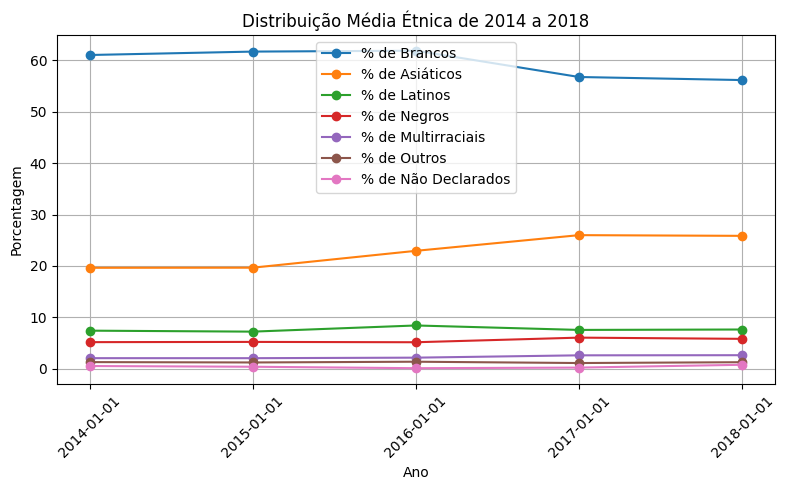

In [191]:
# Filtrar os dados para o intervalo de anos desejado
dados_filtrados = diversity_tratado[(diversity_tratado['Ano'] >= '2014-01-01') & (diversity_tratado['Ano'] <= '2018-01-01')]

# Calcular a média das porcentagens de cada grupo étnico para cada ano
media_porcentagem_brancos_por_ano = dados_filtrados.groupby('Ano')['% de Brancos'].mean()
media_porcentagem_asiaticos_por_ano = dados_filtrados.groupby('Ano')['% de Asiáticos'].mean()
media_porcentagem_latinos_por_ano = dados_filtrados.groupby('Ano')['% de Latinos'].mean()
media_porcentagem_negros_por_ano = dados_filtrados.groupby('Ano')['% de Negros'].mean()
media_porcentagem_multirraciais_por_ano = dados_filtrados.groupby('Ano')['% de Multirraciais'].mean()
media_porcentagem_outros_por_ano = dados_filtrados.groupby('Ano')['% de Outros'].mean()
media_porcentagem_nao_declarados_por_ano = dados_filtrados.groupby('Ano')['% de Não Declarados'].mean()

# Criar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(media_porcentagem_brancos_por_ano.index, media_porcentagem_brancos_por_ano.values, marker='o', linestyle='-', label='% de Brancos')
plt.plot(media_porcentagem_asiaticos_por_ano.index, media_porcentagem_asiaticos_por_ano.values, marker='o', linestyle='-', label='% de Asiáticos')
plt.plot(media_porcentagem_latinos_por_ano.index, media_porcentagem_latinos_por_ano.values, marker='o', linestyle='-', label='% de Latinos')
plt.plot(media_porcentagem_negros_por_ano.index, media_porcentagem_negros_por_ano.values, marker='o', linestyle='-', label='% de Negros')
plt.plot(media_porcentagem_multirraciais_por_ano.index, media_porcentagem_multirraciais_por_ano.values, marker='o', linestyle='-', label='% de Multirraciais')
plt.plot(media_porcentagem_outros_por_ano.index, media_porcentagem_outros_por_ano.values, marker='o', linestyle='-', label='% de Outros')
plt.plot(media_porcentagem_nao_declarados_por_ano.index, media_porcentagem_nao_declarados_por_ano.values, marker='o', linestyle='-', label='% de Não Declarados')

plt.title('Distribuição Média Étnica de 2014 a 2018')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.legend()
plt.tight_layout()
plt.show()


###### **Insights:**

- **Diminuição na Representação de Brancos:** A presença de funcionários brancos diminuiu ao longo dos anos, começando em cerca de 60% em 2014 e chegando a pouco menos de 50% em 2018.
- **Estabilidade nos Outros Grupos Étnicos:** A representação dos outros grupos étnicos (asiáticos, latinos, negros, multirraciais, outros e não declarados) permaneceu relativamente estável durante todo o período.

### 3. Tendências temporais da distribuição de homens e mulheres por empresa (2014 a 2018)

###### Este código analisa as tendências temporais da distribuição de gênero em empresas específicas durante o período de 2014 a 2018. Para cada empresa, são calculadas as médias anuais das porcentagens de mulheres e homens e plotadas em gráficos separados. As linhas correspondentes à porcentagem de mulheres são destacadas em vermelho, enquanto as linhas correspondentes à porcentagem de homens são destacadas em azul. Essa abordagem permite uma visualização clara das variações na distribuição de gênero ao longo do tempo em cada organização individualmente, fornecendo insights sobre a evolução da diversidade de gênero dentro dessas empresas durante o período analisado.

In [197]:
# Criar um dicionário para armazenar os dataframes de cada empresa
empresas_dataframes = {}

# Iterar sobre cada empresa e criar um dataframe separado
for empresa in diversity_tratado['Empresa'].unique():
    empresa_dataframe = diversity_tratado[diversity_tratado['Empresa'] == empresa].copy()
    empresas_dataframes[empresa] = empresa_dataframe


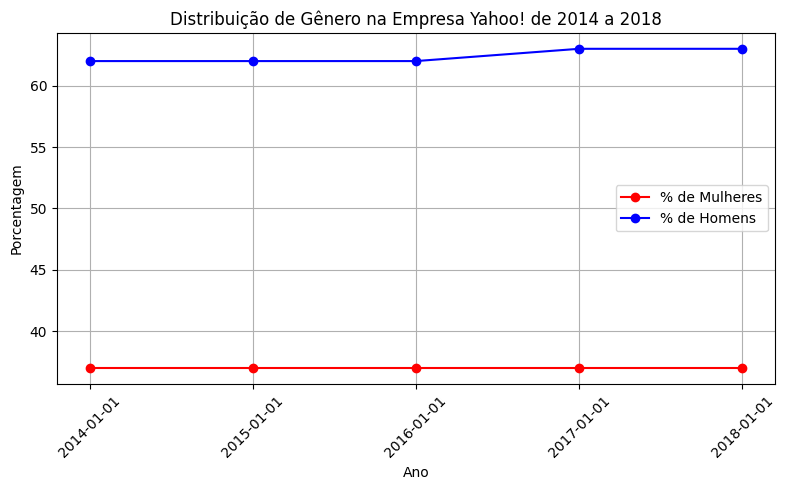

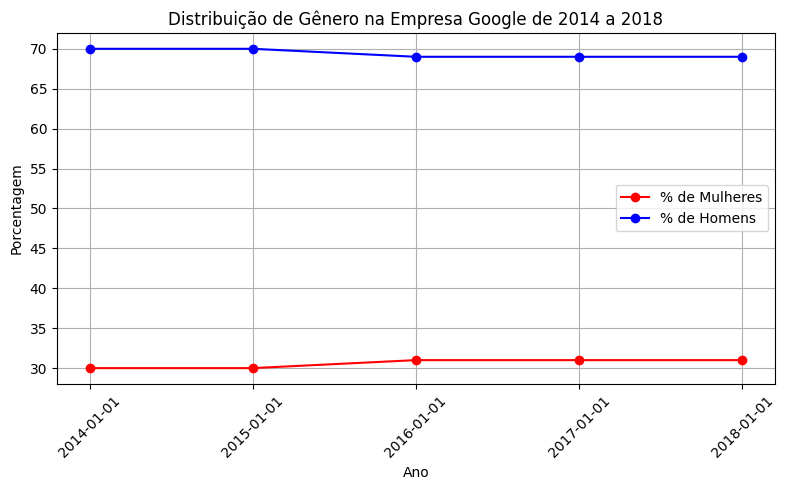

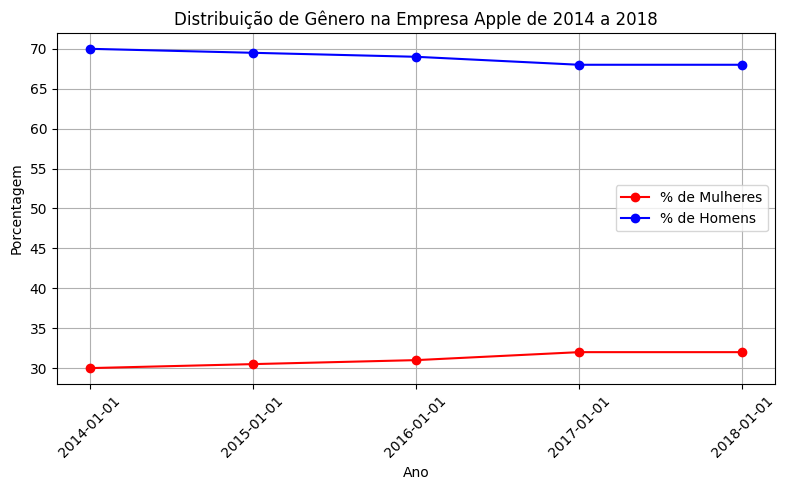

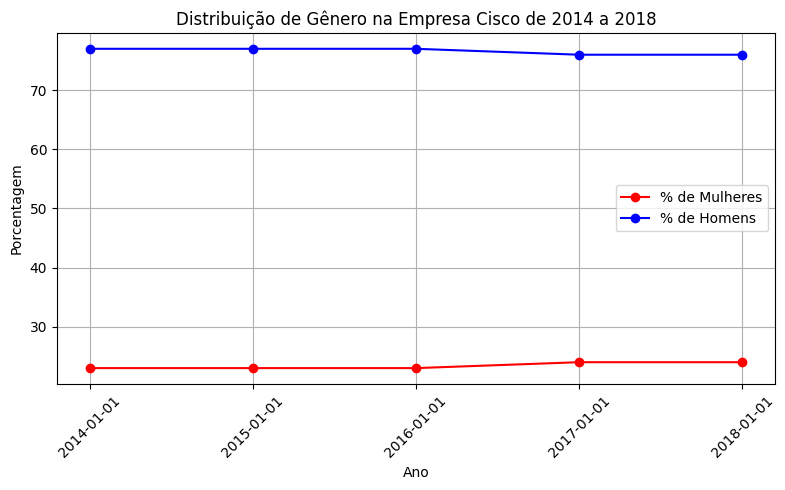

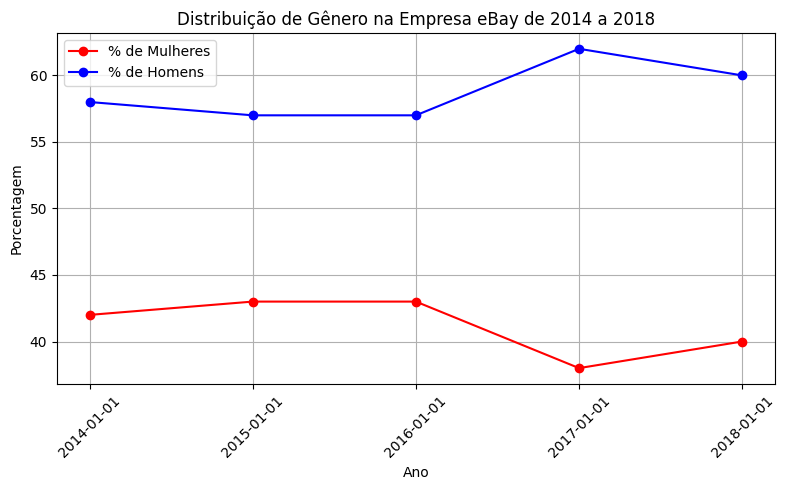

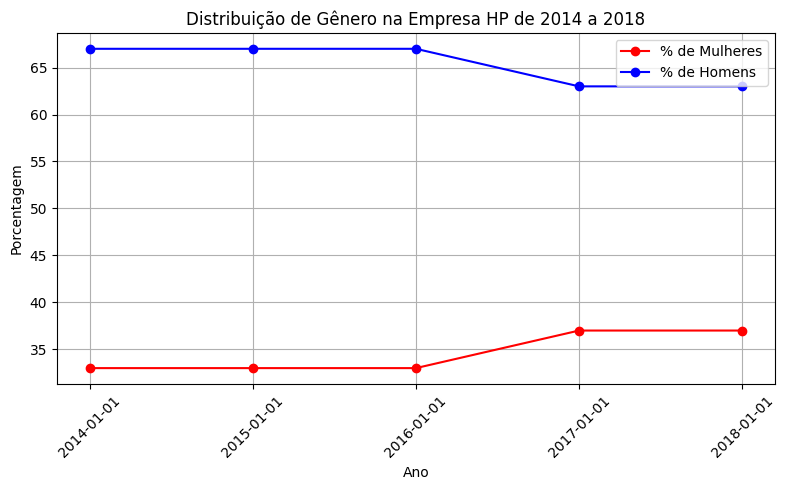

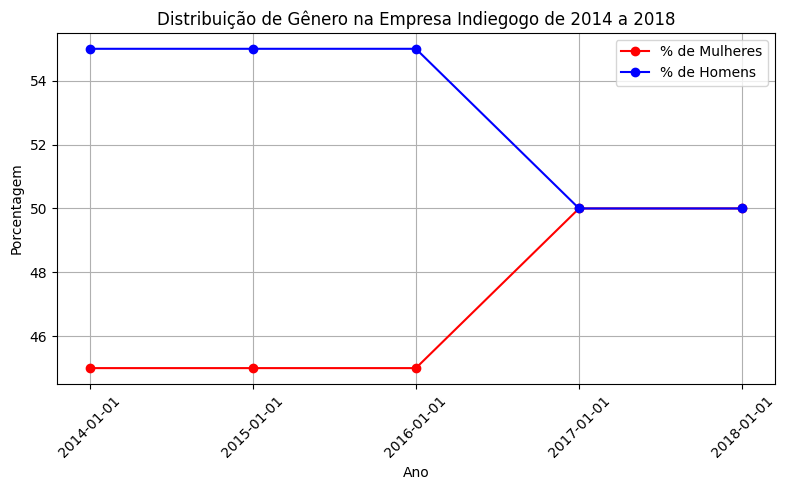

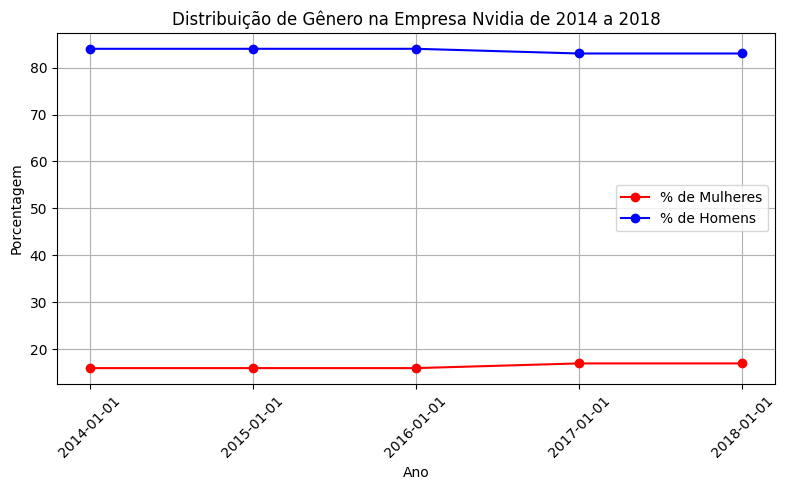

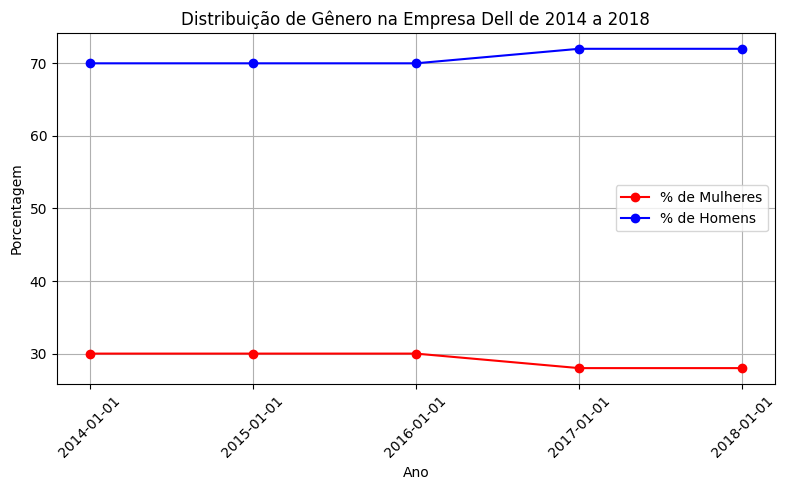

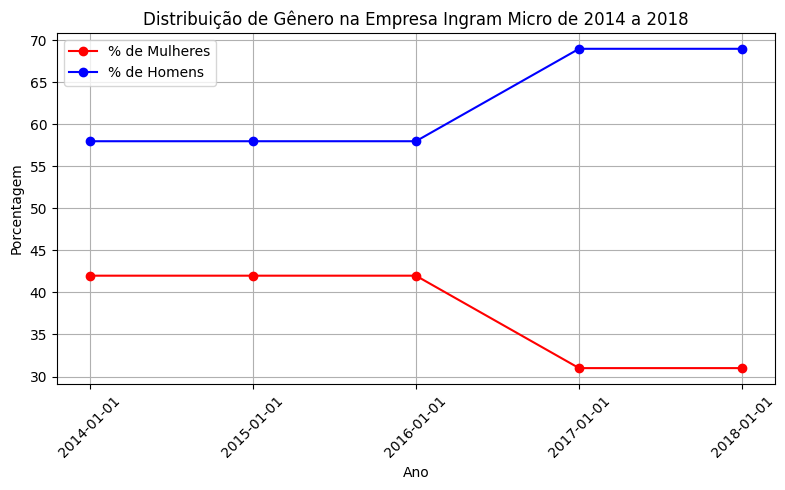

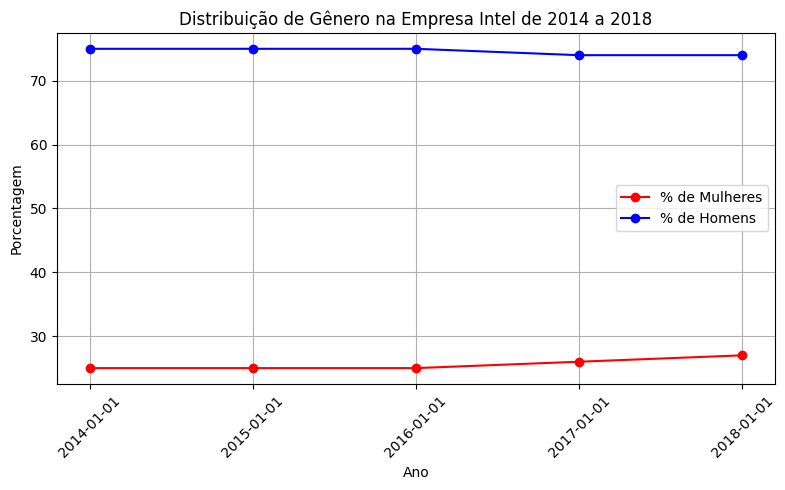

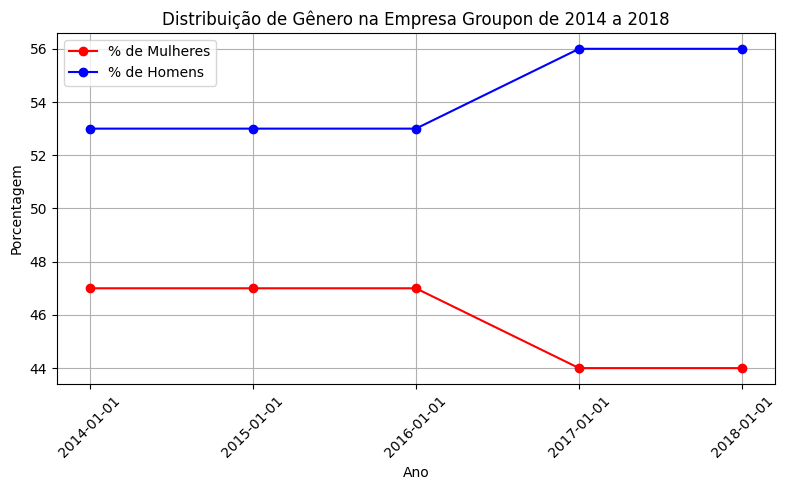

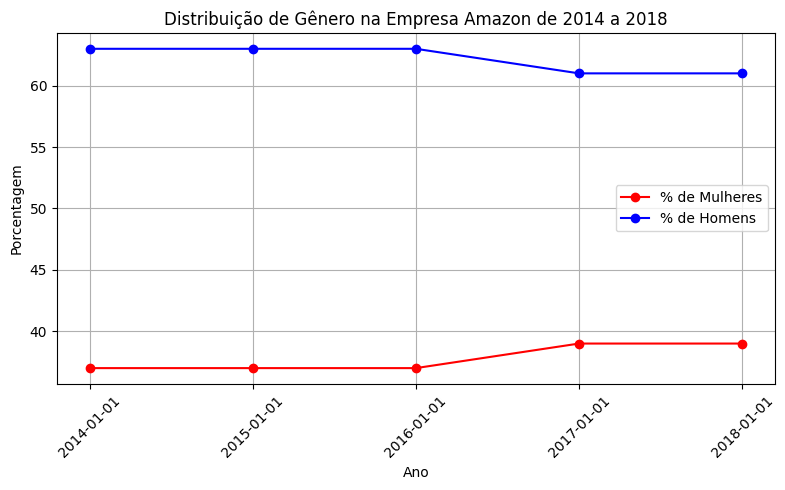

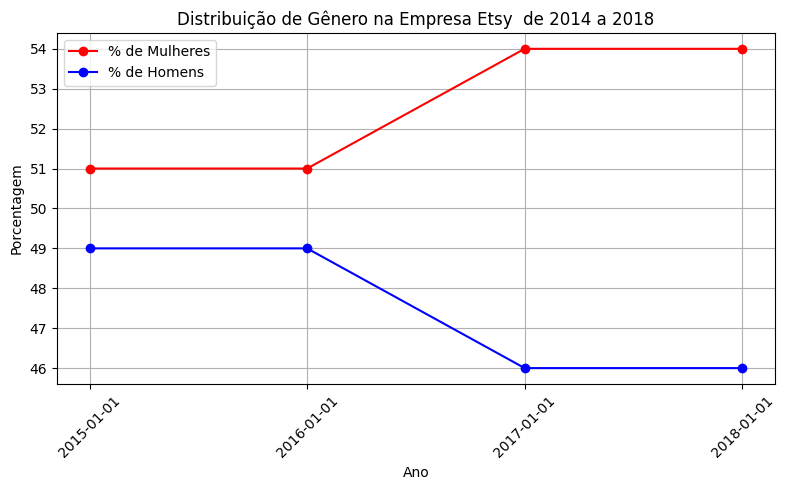

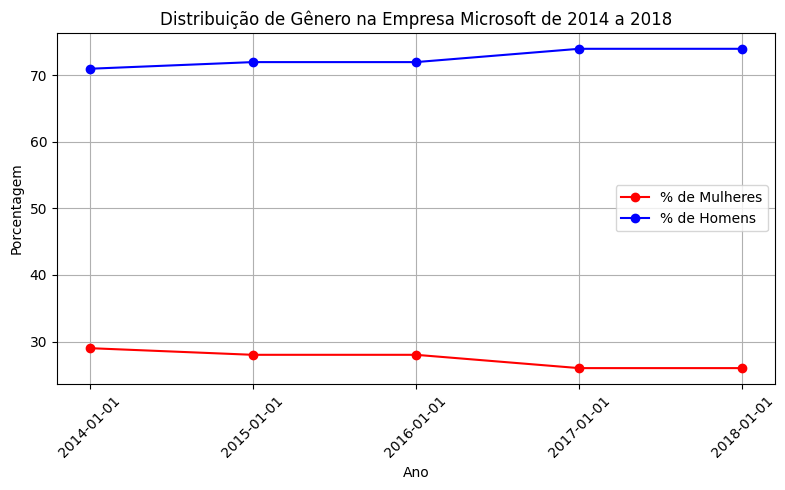

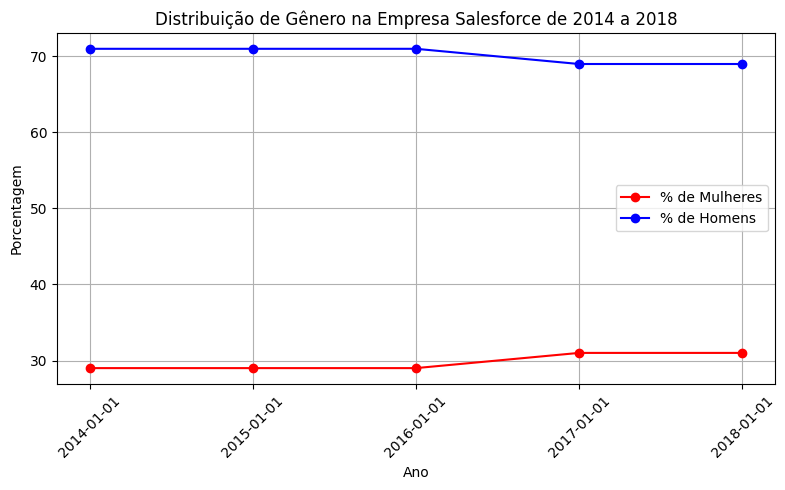

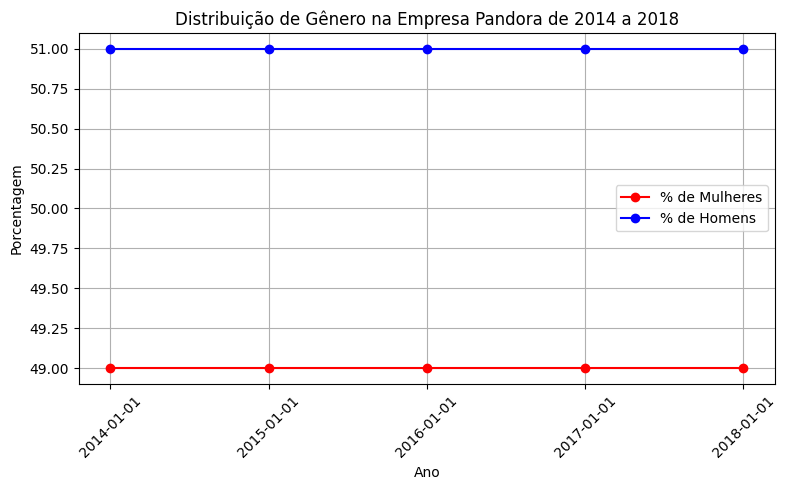

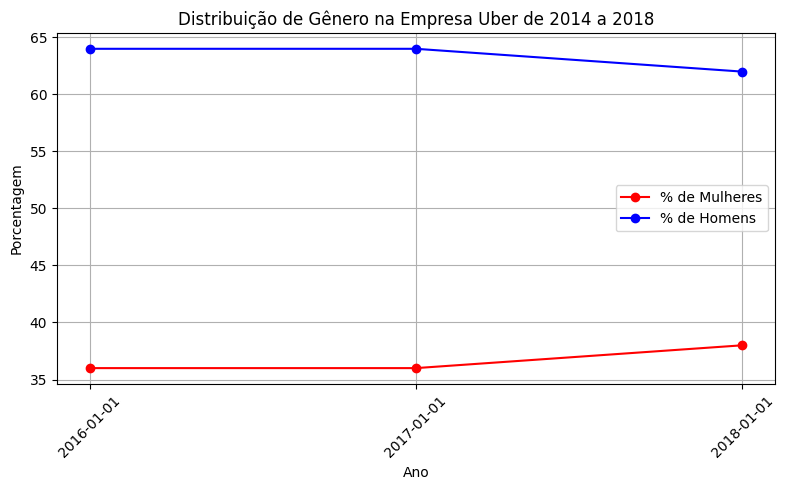

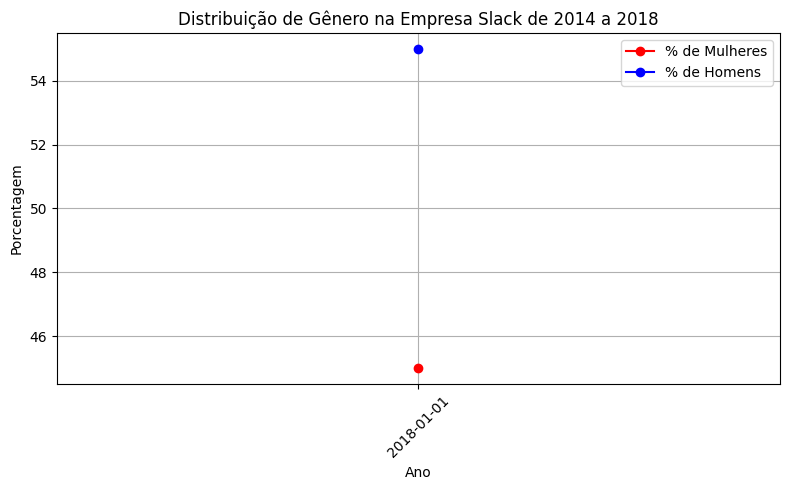

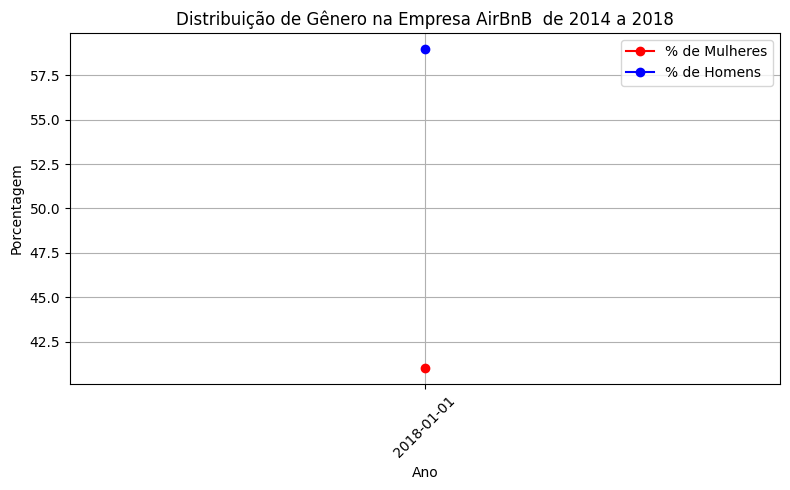

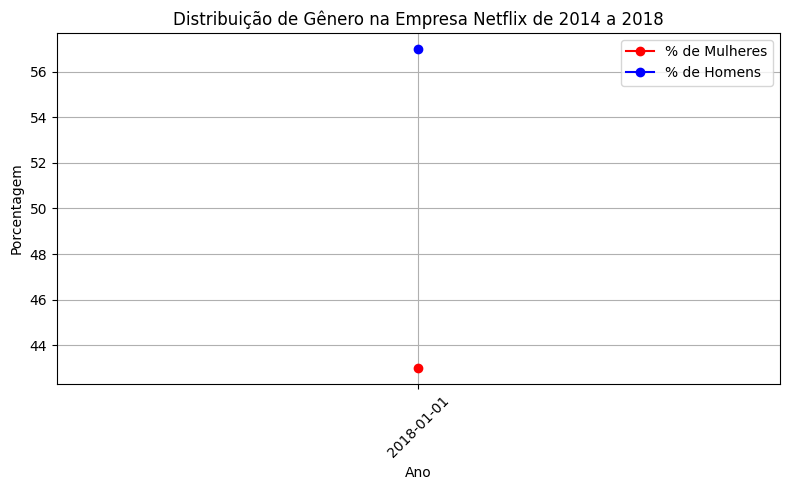

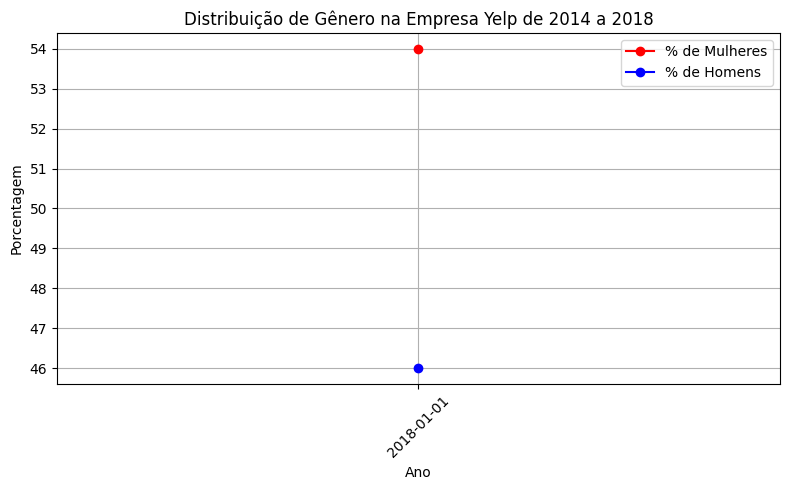

In [198]:
# Iterar sobre cada empresa e plotar as tendências temporais
for empresa, dataframe in empresas_dataframes.items():
    # Calcular a média das porcentagens de mulheres e homens para cada ano
    media_porcentagem_mulheres_por_ano = dataframe.groupby('Ano')['% de Mulheres'].mean()
    media_porcentagem_homens_por_ano = dataframe.groupby('Ano')['% de Homens'].mean()

    # Criar o gráfico de linha
    plt.figure(figsize=(8, 5))
    plt.plot(media_porcentagem_mulheres_por_ano.index, media_porcentagem_mulheres_por_ano.values, marker='o', linestyle='-', color='red', label='% de Mulheres')
    plt.plot(media_porcentagem_homens_por_ano.index, media_porcentagem_homens_por_ano.values, marker='o', linestyle='-', color='blue', label='% de Homens')
    plt.title(f'Distribuição de Gênero na Empresa {empresa} de 2014 a 2018')
    plt.xlabel('Ano')
    plt.ylabel('Porcentagem')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.legend()
    plt.tight_layout()
    plt.show()


###### **Insights:**

1. **Predominância Masculina:**
   - Em todas as empresas analisadas, a porcentagem de homens (linha azul) foi consistentemente superior à de mulheres (linha vermelha) durante todo o período de 2014 a 2018. Este padrão sugere uma predominância masculina no setor de tecnologia ao longo dos anos.

2. **Estabilidade na Distribuição de Gênero:**
   - A porcentagem de mulheres se manteve relativamente estável em cada empresa ao longo do período, sem grandes variações significativas. Isso indica que as iniciativas de diversidade de gênero não resultaram em mudanças drásticas na composição de gênero das empresas.

3. **Evolução Lenta de Inclusão Feminina:**
   - Embora a porcentagem de mulheres tenha permanecido constante, algumas empresas mostraram uma ligeira tendência de aumento na representação feminina. No entanto, essas mudanças foram pequenas e não suficientes para inverter a predominância masculina.

4. **Diferenciação entre Empresas:**
   - Algumas empresas, embora ainda predominantemente masculinas, apresentaram porcentagens de mulheres mais altas em comparação com outras. Essas empresas podem ser analisadas como casos de estudo para entender as práticas de inclusão que resultaram em uma maior representação feminina.

A análise da distribuição de gênero nas empresas de tecnologia de 2014 a 2018 revela uma predominância masculina constante, com a porcentagem de homens significativamente maior que a de mulheres. A estabilidade na representação feminina sugere que, apesar das iniciativas de diversidade, não houve mudanças substanciais na composição de gênero. Embora algumas empresas tenham mostrado uma leve tendência de aumento na inclusão feminina, estas variações foram insuficientes para equilibrar a predominância masculina, destacando a necessidade de ações mais eficazes e comprometidas para promover a paridade de gênero no setor.

### 4. Ranking - porcentagem de mulheres por empresa (2014 a 2018)



###### Este código realiza os seguintes passos:
1. Filtra os dados para o intervalo de anos de 2014 a 2018.
2. Itera sobre cada ano e filtra os dados para o ano atual.
3. Ordena as empresas pela porcentagem de mulheres em ordem decrescente.
4. Armazena o ranking de empresas por ano em um dicionário.
5. Plota um gráfico de barras ordenado para cada ano, onde o eixo x representa as empresas e o eixo y representa a porcentagem de mulheres.

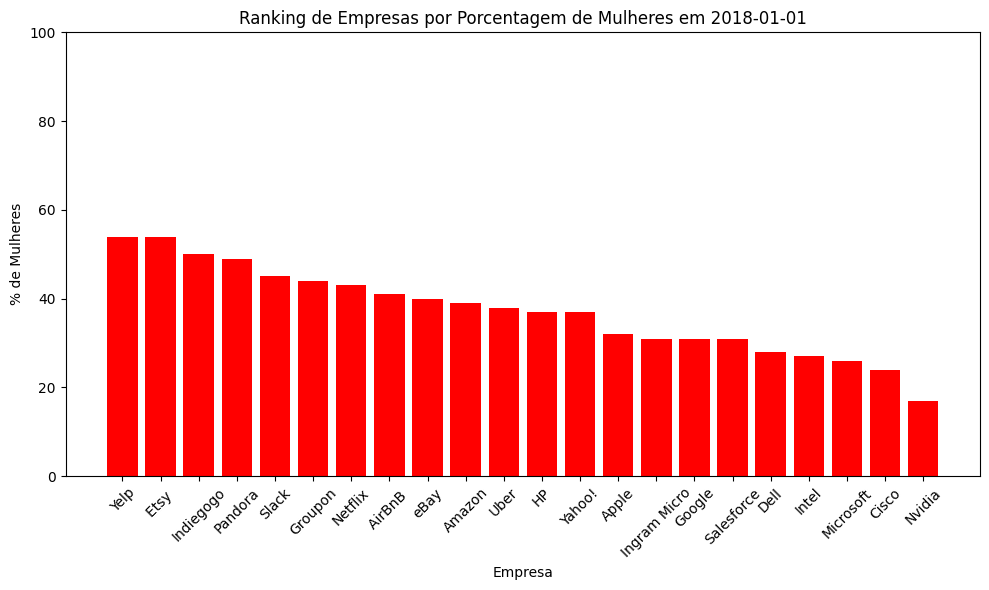

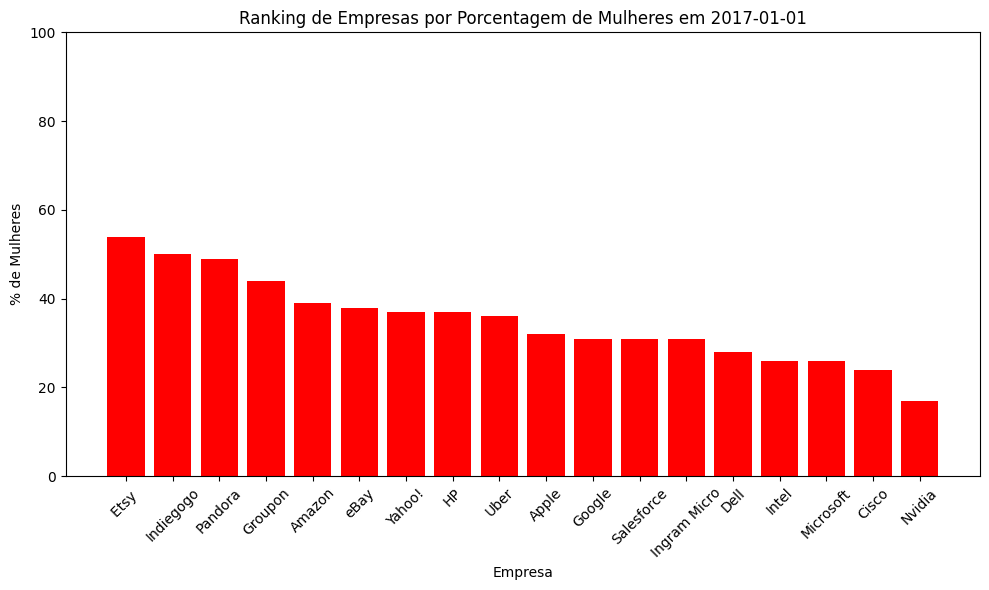

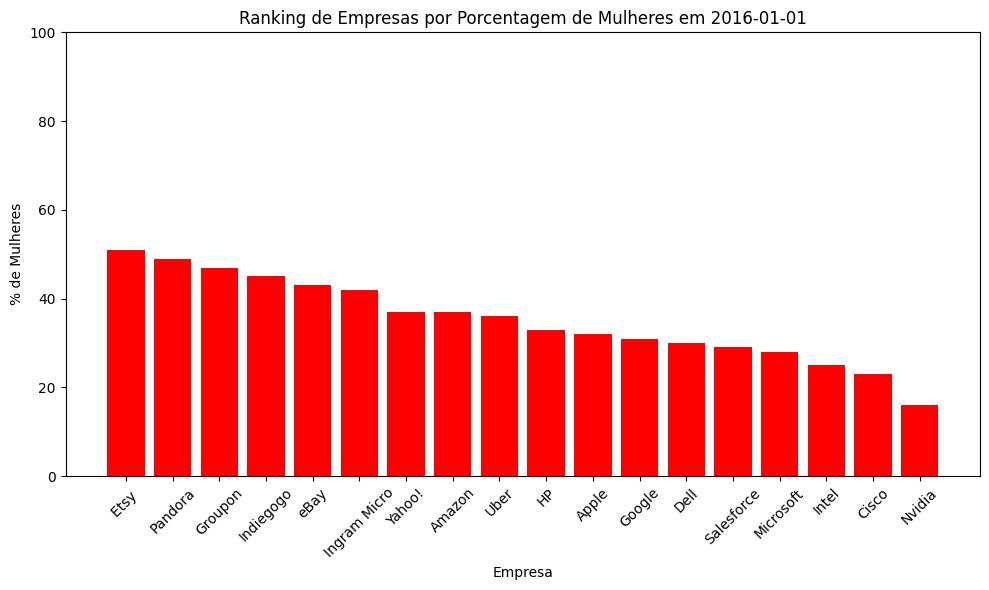

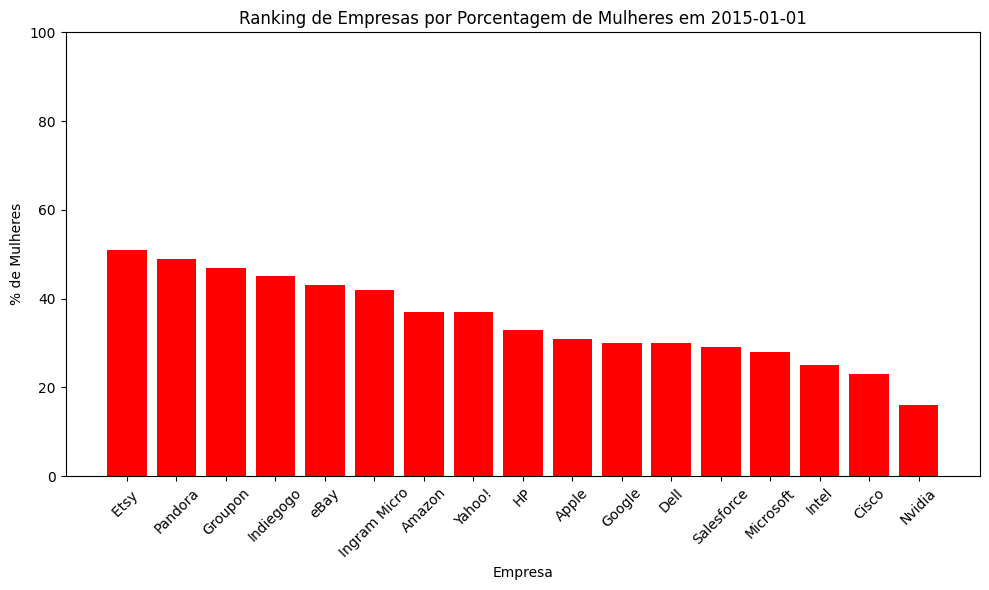

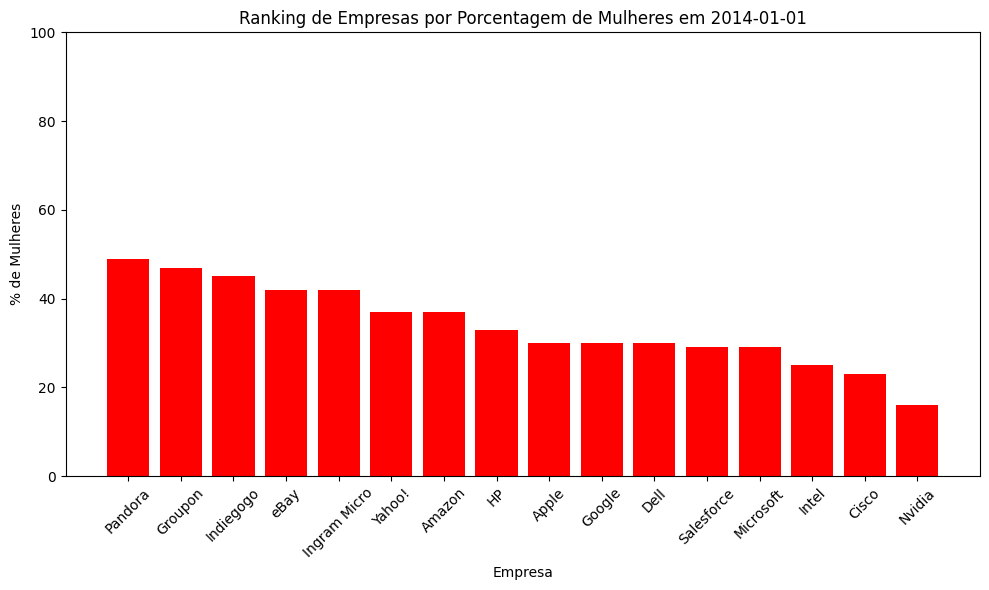

In [196]:
# Filtrar os dados para o intervalo de anos desejado
dados_filtrados = diversity_tratado[(diversity_tratado['Ano'] >= '2014-01-01') & (diversity_tratado['Ano'] <= '2018-01-01')]

# Iterar sobre cada ano e criar o ranking
anos = dados_filtrados['Ano'].unique()
ranking_por_ano = {}

for ano in anos:
    # Filtrar os dados para o ano atual
    dados_ano = dados_filtrados[dados_filtrados['Ano'] == ano]

    # Ordenar as empresas pela porcentagem de mulheres
    ranking_ano = dados_ano[['Empresa', '% de Mulheres']].sort_values(by='% de Mulheres', ascending=False)

    # Adicionar ao dicionário de rankings
    ranking_por_ano[ano] = ranking_ano

# Plotar os rankings
for ano, ranking in ranking_por_ano.items():
    plt.figure(figsize=(10, 6))
    plt.bar(ranking['Empresa'], ranking['% de Mulheres'], color='red')
    plt.title(f'Ranking de Empresas por Porcentagem de Mulheres em {ano}')
    plt.xlabel('Empresa')
    plt.ylabel('% de Mulheres')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


###### **Insights:**
1. Etsy: Demonstrou uma liderança consistente ao longo dos anos, sempre aparecendo no top 3 e frequentemente ocupando a primeira posição. Isso sugere um compromisso forte e contínuo com a diversidade de gênero e uma cultura corporativa que promove a inclusão.
2. Pandora: Também mostra uma forte presença nos rankings, particularmente nos primeiros anos (2014-2016), indicando um início robusto de políticas de diversidade que talvez precisem ser revitalizadas nos anos seguintes.
3. Groupon: Sua presença frequente nos primeiros lugares sugere um esforço constante para melhorar a representação feminina, embora possa ter havido flutuações ao longo dos anos.
4. Indiegogo: Embora não tenha aparecido consistentemente todos os anos, seu retorno ao top 3 em 2017 e 2018 sugere uma renovação ou intensificação dos esforços de diversidade.
5. Yelp: O surgimento no topo em 2018 pode indicar uma nova iniciativa ou uma melhoria significativa nas políticas de diversidade de gênero.

### 5.Top 5 das empresas com maiores porcentagens de mulheres (2014 a 2018)

In [195]:
# Filtrar os dados para o intervalo de anos desejado
dados_filtrados = diversity_tratado[(diversity_tratado['Ano'] >= '2014-01-01') & (diversity_tratado['Ano'] <= '2018-01-01')]

# Calcular a média das porcentagens de mulheres para cada empresa ao longo dos anos
media_porcentagem_mulheres_por_empresa = dados_filtrados.groupby('Empresa')['% de Mulheres'].mean()

# Ordenar as empresas pela média das porcentagens de mulheres e obter o top 5
top_5_empresas_mulheres = media_porcentagem_mulheres_por_empresa.sort_values(ascending=False).head(5)

print("Top 5 empresas que mais contrataram mulheres entre 2014 e 2018:")
print(top_5_empresas_mulheres)


Top 5 empresas que mais contrataram mulheres entre 2014 e 2018:
Empresa
Yelp         54.0
Etsy         52.5
Pandora      49.0
Indiegogo    47.0
Groupon      45.8
Name: % de Mulheres, dtype: float64
